<a href="https://colab.research.google.com/github/Siouar/obesity_detection/blob/main/Masterclass_Machine_Learnia_21_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairies

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/adeniranstephen/obesity-prediction-dataset/versions/1


In [ ]:
os.listdir(path)

['ObesityDataSet_raw_and_data_sinthetic.csv']

In [ ]:
df = pd.read_csv(path + '/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II




*   Gender – Male or Female.
*   Age – The person’s age in years.
* Height – Height in meters.
* Weight – Weight in kilograms.
* family_history_with_overweight – Whether the person has a family history of * * being overweight (yes/no).
* FAVC – If the person frequently consumes high-calorie foods (yes/no).
* FCVC – Frequency of vegetable consumption (scale from 1 to 3).
* NCP – Number of main meals per day.
* CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
* SMOKE – Whether the person smokes (yes/no).
* CH2O – Daily water intake (scale from 1 to 3).
* SCC – If the person monitors their calorie intake (yes/no).
* FAF – Physical activity frequency (scale from 0 to 3).
* TUE – Time spent using technology (scale from 0 to 3).
* CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
* MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).

Target :

* NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
df[~df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.select_dtypes(include="object").columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.select_dtypes(exclude="object").columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [ ]:
df["NObeyesdad"].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [ ]:
df["family_history_with_overweight"].value_counts()

,count
family_history_with_overweight,
yes,1726
no,385


In [ ]:
pd.crosstab(df["NObeyesdad"], df["family_history_with_overweight"])

family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Obesity_Type_I,7,344
Obesity_Type_II,1,296
Obesity_Type_III,0,324
Overweight_Level_I,81,209
Overweight_Level_II,18,272


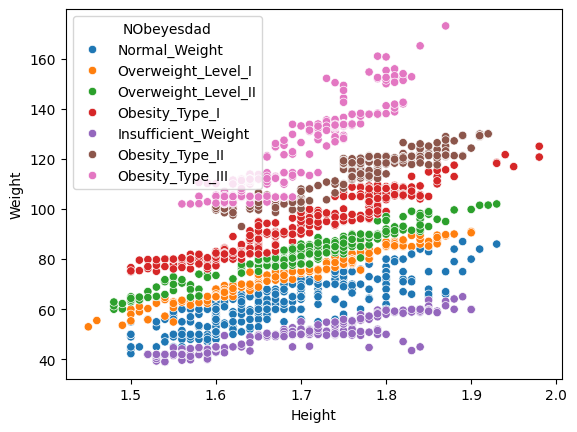

In [ ]:
sns.scatterplot(df, x="Height", y="Weight", hue="NObeyesdad")
plt.show()

# Machine Learning

In [ ]:
df.select_dtypes(exclude="object").columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'NObeyesdad'],
      dtype='object')

In [ ]:
df["CAEC"].value_counts()

,count
CAEC,
Sometimes,1765
Frequently,242
Always,53
no,51


In [ ]:
encoding = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
df["CAEC"] = df["CAEC"].map(encoding)

In [ ]:
df["CALC"] = df["CALC"].map(encoding)

In [ ]:
df["MTRANS"].value_counts()

,count
MTRANS,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


In [ ]:
X = df[['Age', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC']]

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df["NObeyesdad"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_test.shape

(528, 8)

In [ ]:
X

,Age,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
0,21,2.0,3.0,1,2.00,0.00,1.000,0
1,21,3.0,3.0,1,3.00,3.00,0.000,1
2,23,2.0,3.0,1,2.00,2.00,1.000,2
3,27,3.0,3.0,1,2.00,2.00,0.000,2
4,22,2.0,1.0,1,2.00,0.00,0.000,1
...,...,...,...,...,...,...,...,...
2106,21,3.0,3.0,1,1.73,1.68,0.906,1
2107,22,3.0,3.0,1,2.01,1.34,0.599,1
2108,23,3.0,3.0,1,2.05,1.41,0.646,1
2109,24,3.0,3.0,1,2.85,1.14,0.586,1


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
model = LogisticRegression().fit(X_train_scaled, y_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
accuracy_score(y_true=y_test, y_pred=predictions)

0.44507575757575757

In [ ]:
import pickle